# 07.02 - DESIGN ML ALGORITHMS

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
from init import init; init(force_download=False)

replicating local resources


## Cómo se diseña un algoritmo ML

1. Elegir de qué parámetros depende una predicción $\rightarrow$ se define **cómo** es un modelo.
2. Definir una función que mida el error de la predicción.
3. Determinar qué valores de los parámetros minimizan el error de predicción.


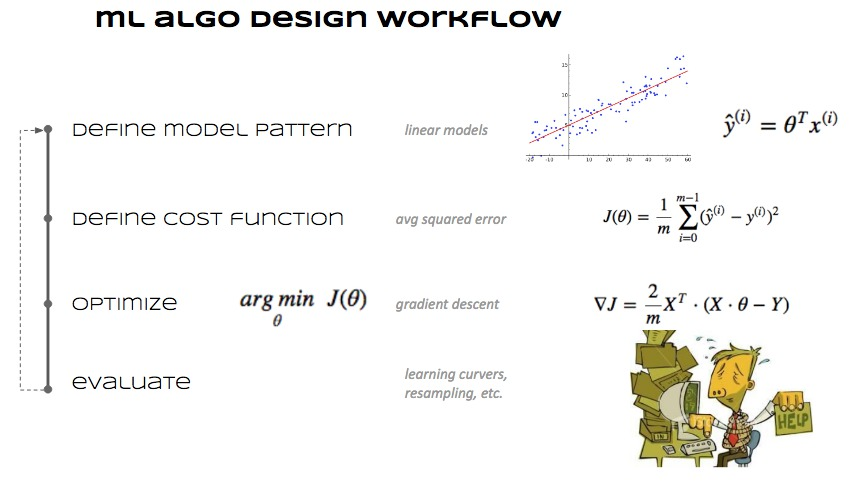

In [ ]:
## KEEPOUTPUT
from IPython.display import Image
Image(filename='local/imgs/mldesign.jpg', width=800)

## Ejemplo

Los Trilotrópicos son insectos imaginarios que viven en las latitudes tropicales. Conocer su densidad de escamas es muy importante para poder saber qué insecticida aplicar. Pero **es muy costoso** contar las escamas.

Creemos que existe una relación entre la **longitud** y la **densidad de escamas** y queremos un modelo que prediga la densidad **a partir de la longitud**.

Esto es una tarea de regresión, ya que la predicción $\in \mathbb{R}$

Tenemos **datos anotados** (alguien contó las escamas de unos cuantos trilotrópicos) $\rightarrow$ estamos ante una tarea de **aprendizaje supervisado**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
%matplotlib inline

(150, 2)


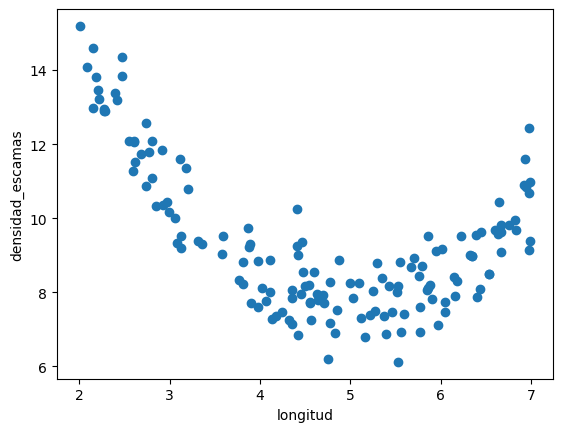

In [ ]:
## KEEPOUTPUT
d = pd.read_csv("local/data/trilotropicos.csv")
print (d.shape)
plt.scatter(d.longitud, d.densidad_escamas)
plt.xlabel(d.columns[0])
plt.ylabel(d.columns[1]);

### 1. Elegimos la forma del modelo

**Entrada**
- $x^{(i)}$: longitud del trilotrópico $i$

**Salida esperada**
- $y^{(i)}$: densidad de escamas del trilotrópico $i$

**Predicción ** $\rightarrow$ decidimos que nuestro modelo tiene la siguiente forma

- $\hat{y}^{(i)} = \theta_0 + \theta_1 x^{(i)}$

La siguiente es una posible combinación de $\theta_0$ y $\theta_1$ seleccionada aleatoriamente. Ejecútalo varias veces para entender el error.

In [ ]:
def linear_prediction(t, x):
    t0,t1 = t
    return t0 + t1*x

In [ ]:
## KEEPOUTPUT
t0 = np.random.random()*5+10
t1 = np.random.random()*4-3
p = d.iloc[np.random.randint(len(d))]
long = p.longitud
dens = p.densidad_escamas
print ("RANDOM t0 = %.3f, t1 = %.3f"%(t0,t1))
print ("\nlong = %.3f\ndens = %.3f"%(long, dens))
print ("\npred = %.3f (WITH RANDOM t0 t1)"%linear_prediction([t0,t1], long) )

RANDOM t0 = 11.547, t1 = -1.316

long = 5.509
dens = 8.010

pred = 4.299 (WITH RANDOM t0 t1)


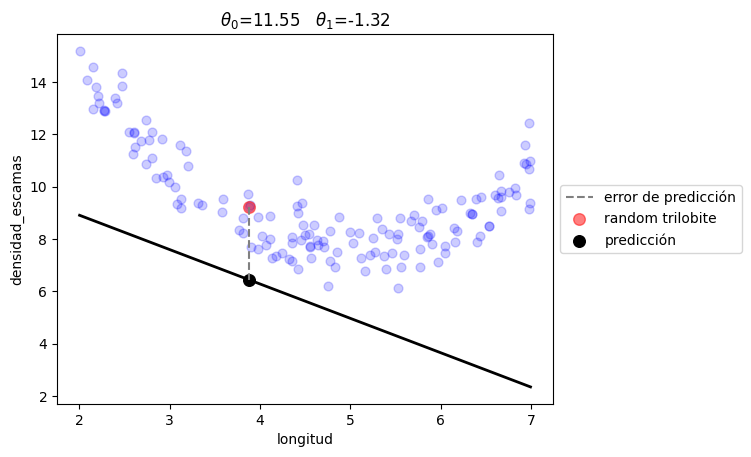

In [ ]:
## KEEPOUTPUT
def plot_model(t, prediction):
    xr = np.linspace(np.min(d.longitud), np.max(d.longitud), 100)
    plt.scatter(d.longitud, d.densidad_escamas, s=40, alpha=.2, color="blue", label="")
    plt.plot(xr,prediction(t,xr), lw=2, color="black")
    plt.title("   ".join([r"$\theta_%d$=%.2f"%(i, t[i]) for i in range(len(t))]));

    p = d.iloc[np.random.randint(len(d))]
    pred = prediction(t, p.longitud)
    plt.plot([p.longitud, p.longitud], [p.densidad_escamas, pred], ls="--", color="gray", label=u"error de predicción")
    plt.scatter(p.longitud, p.densidad_escamas, s=70, alpha=.5, color="red", label="random trilobite")
    plt.scatter(p.longitud, pred, s=70, alpha=1., color="black", label=u"predicción")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.xlabel(d.columns[0])
    plt.ylabel(d.columns[1]);
    

plot_model([t0,t1], linear_prediction)

### 2. Definimos una medida de error

Para un dato cualquiera $(i)$
$$
\begin{align}
err^{(i)} &= (\hat{y}^{(i)}-y^{(i)})^2\\
&=(\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2
\end{align}$$

Para todo el dataset

$$J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=0}^{m-1}(\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2$$

si asumimos que

- $\overline{\theta} = [\theta_0, \theta_1]$
- $\mathbf{x}^{(i)} = [1, x^{(i)}]$

entonces podemos escribir de manera más compacta la expresión anterior:

$$J(\overline{\theta}) = \frac{1}{m} \sum_{i=0}^{m-1}(\overline{\theta} \dot \;  \mathbf{x}^{(i)} - y^{(i)})^2$$


In [ ]:
def J(t, x, y, prediction):
    return np.mean( (prediction(t,x)-y)**2)
    

In [ ]:
J([t0,t1], d.longitud, d.densidad_escamas, linear_prediction)

18.879799873990265

In [ ]:
d.shape

(150, 2)

### 3. Obtenemos los parámetros que minimizan el error de predicción

observa cómo usamos un **algoritmo genérico de optimización**

In [ ]:
## KEEPOUTPUT
r1 = minimize(lambda t: J(t, d.longitud, d.densidad_escamas, linear_prediction), np.random.random(size=2))
r1

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.7447662570804288
        x: [ 1.269e+01 -7.181e-01]
      nit: 9
      jac: [ 1.162e-06  5.782e-06]
 hess_inv: [[ 5.575e+00 -1.092e+00]
            [-1.092e+00  2.343e-01]]
     nfev: 30
     njev: 10

error total 2.74


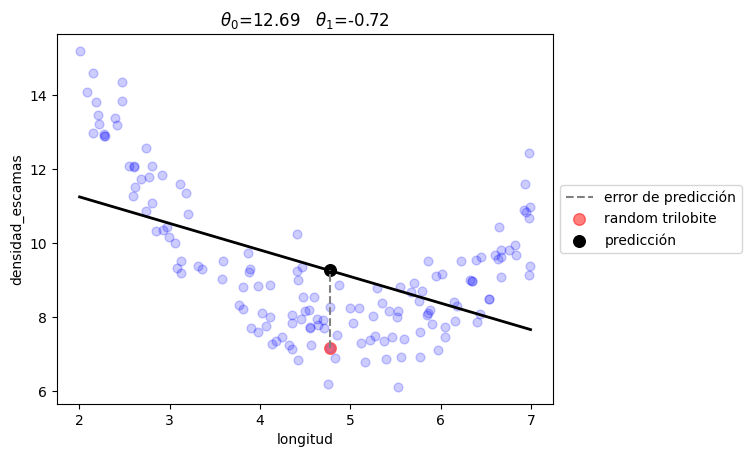

In [ ]:
## KEEPOUTPUT
plot_model(r1.x, linear_prediction)
print ("error total %.2f"%(J(r1.x, d.longitud, d.densidad_escamas, linear_prediction)))

fíjate que son los mismos valores que la regresión lineal clásica 

12.689998055222224 [-0.71805908]
error total 2.74


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


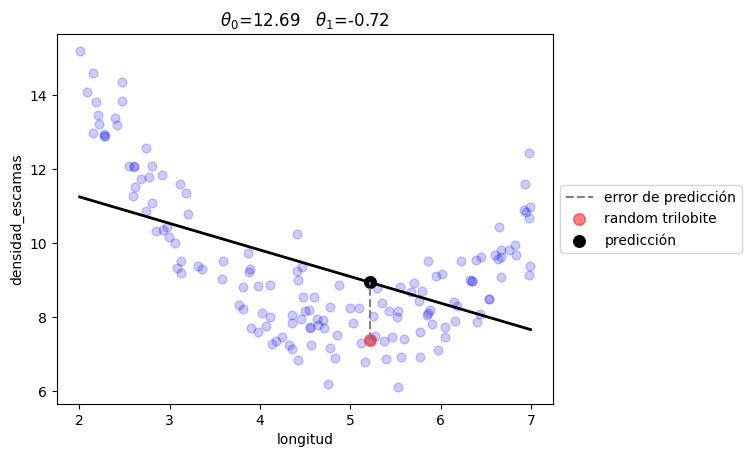

In [ ]:
## KEEPOUTPUT
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(d.longitud.values.reshape(-1,1), d.densidad_escamas)
t0, t1 = lr.intercept_, lr.coef_
print (t0, t1)
plot_model([t0,t1], linear_prediction)
print ("error total %.2f"%(J([t0, t1], d.longitud, d.densidad_escamas, linear_prediction)))

## WARN!! Black box optimization can only be used for VERY SIMPLE models

in ML normally you have to:

- compute the partial derivatives of the parameters of the cost function
- use optimizers specially designed for ML

## Otra forma de modelo

esta vez con tres parámetros y un término **cuadrático**

$$\hat{y}^{(i)} = \theta_0 + \theta_1 x^{(i)} + \theta_2 (x^{(i)})^2$$


In [ ]:
def quad_prediction(t, x):
    t0,t1,t2 = t
    return t0 + t1*x + t2*x**2

r2 = minimize(lambda t: J(t, d.longitud, d.densidad_escamas, quad_prediction), np.random.random(size=3))
r2

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.5533076730511053
        x: [ 2.676e+01 -7.611e+00  7.570e-01]
      nit: 4
      jac: [ 9.686e-08 -1.267e-07 -1.118e-07]
 hess_inv: [[ 5.074e+01 -2.322e+01  2.430e+00]
            [-2.322e+01  1.107e+01 -1.190e+00]
            [ 2.430e+00 -1.190e+00  1.308e-01]]
     nfev: 36
     njev: 9

error total 0.55


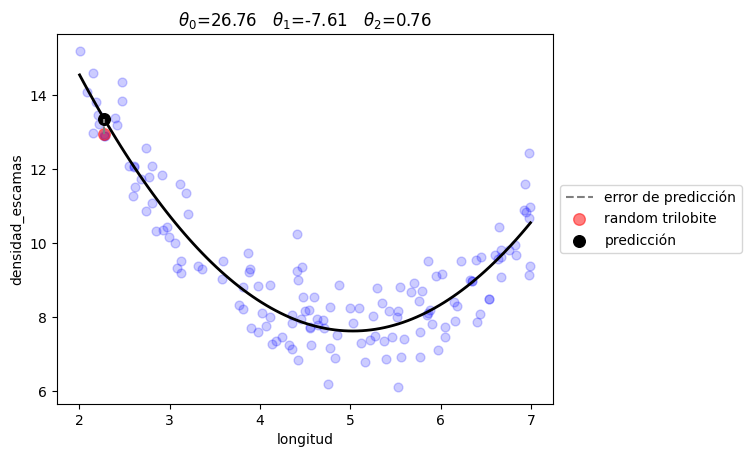

In [ ]:
## KEEPOUTPUT
plot_model(r2.x, quad_prediction)
print ("error total %.2f"%(J(r2.x, d.longitud, d.densidad_escamas, quad_prediction)))

observa como indirectamente hacemos lo mismo con la regresión lineal de `sklearn` añadiendo explícitamente una columna con la longitud al cuadrado

In [ ]:
lr = LinearRegression()
lr.fit(np.r_[[d.longitud.values, d.longitud.values**2]].T, d.densidad_escamas)
t0, (t1, t2) = lr.intercept_, lr.coef_
t0, t1, t2

(26.75883713364987, -7.610553466924379, 0.7570201016172382)